## LOGISTICS REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('heart_disease_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.shape

(303, 14)

In [5]:

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#df.duplicated().sum()

In [7]:
#df.drop_duplicated,inplace= true     ( another way to drop and make permanent)
#df= df.drop_duplicated()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#this target shows that target= 1  shows the person has heart disease, target= 0 shows no heart disease
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
##### EDA.

<Axes: xlabel='age', ylabel='Count'>

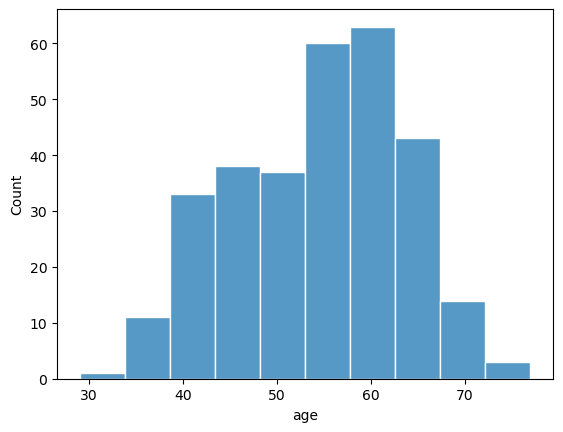

In [10]:
sns.histplot(df['age'], bins=10,edgecolor='white')

<Axes: >

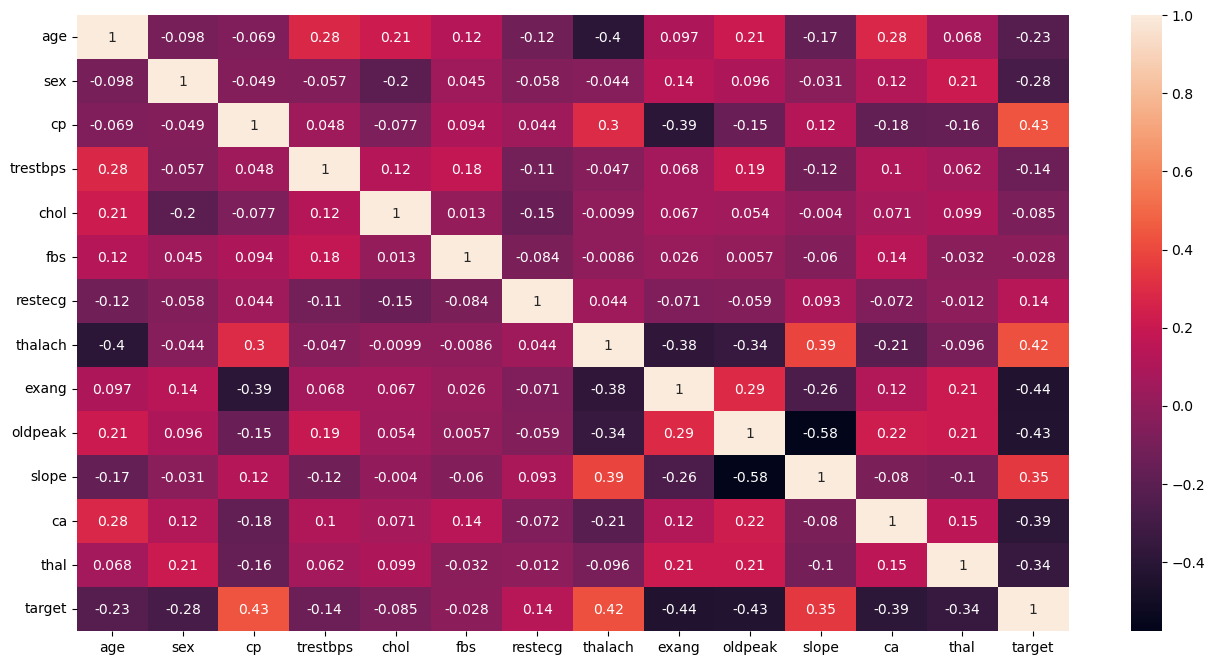

In [11]:
plt.figure(figsize= (16,8)) #used for expanding a heatmap.
sns.heatmap(df.corr(), annot = True)

In [12]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
#we are seperating out dataframe now using the drop command.
# remember axis= 1 means drop targets on the columns axis

y= df['target']
x=df.drop(['target'], axis =1 )


In [14]:
# x= everything in the dataframe minus target(y)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### MODEL TRAINING 

In [15]:
 
from sklearn.model_selection import train_test_split

In [16]:
# Stratify function on the traget to make the distribution of the targets values (0,1) to be even i.e equal
#Stratify function is use only for discrete values which is whole numbers  without decimals
# can not use stratify function for continous data. e,g 4.56, height values 
x_train,x_test, y_train, y_test =train_test_split (x,y, test_size = 0.2, stratify =y, random_state =2)

## MACHINE LEARNING

In [17]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit (x_train, y_train)

C:\Users\RICKY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# ALWAYS ENSURE YOUR SCORE ON THE TRAIN AND TEST DATA IS NOT FAR FROM EACH OTHER.

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score ( x_train_prediction, y_train)
print('Accuracy on Training Data', training_data_accuracy)

Accuracy on Training Data 0.8512396694214877


In [21]:
train_score = model.score (x_train, y_train)
print ('Accuracy on Training Data', train_score)

Accuracy on Training Data 0.8512396694214877


In [22]:
test_score =model.score (x_train, y_train)
print ('Accuracy on Training Data', test_score)

Accuracy on Training Data 0.8512396694214877


In [23]:
model.predict (x_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

##### PREDICTIVE DATA MODEL FOR HEART DISEASE.

In [24]:
#Reshape function convert dataframe to rows and columns. 1, -1  ; rows and column
# opening with a notepad formate frim the main date set in the save directory and input it here and run for the result.
input_data = (54,1,0,140,239,0,1,160,0,1.2,2,0,2)
data = np.array(input_data)
input_data_reshaped = data.reshape ( 1, -1)
prediction = model.predict (input_data_reshaped)
print (prediction)
if prediction == 0:
    print ('This person doesnt have a Heart Disease')
else:
    print ('This person has A Heart Disease. Advised to see A cardiologist')

[1]
This person has A Heart Disease. Advised to see A cardiologist


C:\Users\RICKY\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
# THOU NO NEED RECOPYIN  D LINE OF CODES AGAIN AS OTHER TEST DATA CAN D RUN ON THIS MODEL TO CHECK IF D PERSON IS SICK OR NOT.
input_data = (59,1,0,135,234,0,1,161,0,0.5,1,0,3,)
data = np.array(input_data)
input_data_reshaped = data.reshape ( 1, -1)
prediction = model.predict (input_data_reshaped)
print (prediction)
if prediction == 0:
    print ('This person does not have a Heart Disease')
else:
    print ('This person has A Heart Disease. Advised to see A cardiologist')

[0]
This person does not have a Heart Disease


C:\Users\RICKY\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
!pip install ydata-profiling 

ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)
ERROR: No matching distribution found for ydata-profiling


In [27]:
import pickle

In [28]:
filename = "trained_model.sav"
pickle.dump(model,open (filename,"wb"))

In [29]:
loaded_model = pickle.load (open("trained_model.sav","rb"))